In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
arr=[]
year1=2000
year2=2001
while(year1!=2010):
    string=str(year1)+"-"+str(year2)[2:]
    final_string="./normalized_data"+string+"_normalized.csv"
    arr.append(final_string)
    year1=year1+1
    year2=year2+1
data_frames = []
for file_name in arr:
    data = pd.read_csv(file_name)
    data_frames.append(data)
la_liga = pd.concat(data_frames)




     
     
data= la_liga[['position', 'team', 'points', 'won', 'lost', 'draw', 'played', 'goals_for', 'goal_difference']]
print(la_liga.head())


print(la_liga.shape)


print(la_liga.dtypes)


print(la_liga.isnull().sum())


print(la_liga.describe())


sns.histplot(la_liga['points'], kde=True)
plt.show()


sns.scatterplot(x='goals_for', y='points', data=la_liga)
plt.show()

sns.heatmap(la_liga.corr(), annot=True, cmap='coolwarm')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: './normalized_data2000-01_normalized.csv'

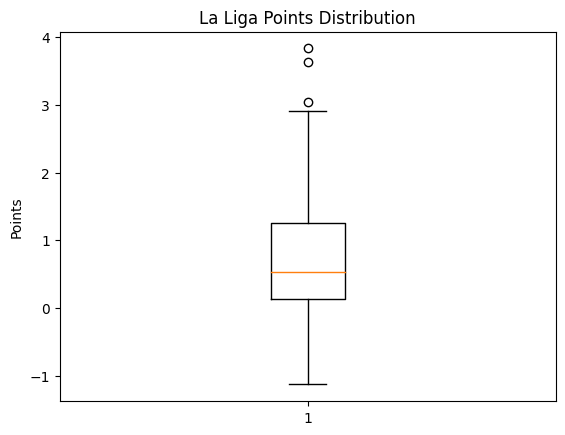

Outliers:
   position         team    points       won      lost      draw    played  \
0         1    Barcelona  3.039666  2.864498 -1.839031 -0.822549  0.777873   
0         1    Barcelona  3.834378  3.698903 -2.728409 -0.822549  0.777873   
1         2  Real Madrid  3.635700  3.698903 -2.061375 -1.735881  0.777873   

   goals_for  goals_against  goal_difference     year  
0   3.665030      -1.015040         0.210485  2008-09  
0   3.217151      -1.892938         0.230129  2009-10  
1   3.473082      -1.015040         0.201717  2009-10  


In [ ]:
plt.boxplot(la_liga['points'])


plt.title('La Liga Points Distribution')
plt.ylabel('Points')

plt.show()


q1 = la_liga['points'].quantile(0.25)
q3 = la_liga['points'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr

outliers = la_liga[(la_liga['points'] > upper_bound) | (la_liga['points'] < lower_bound)]
print('Outliers:')
print(outliers)

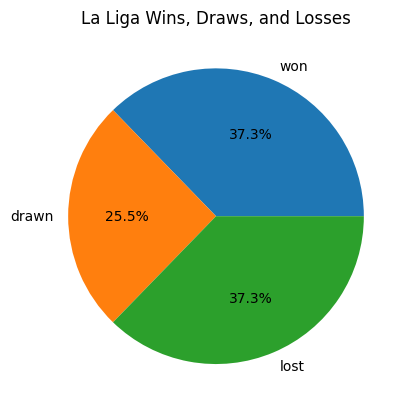

In [ ]:
arr=[]
year1=2000
year2=2001
while(year1!=2010):
    string=str(year1)+"-"+str(year2)[2:]
    final_string="./orig_data/laliga_points_table_"+string+".csv"
    arr.append(final_string)
    year1=year1+1
    year2=year2+1
data_frames = []
for file_name in arr:
    data = pd.read_csv(file_name)
    data_frames.append(data)
la_liga = pd.concat(data_frames)




     
data= la_liga[['position', 'team', 'played', 'won', 'drawn', 'lost', 'goals_for', 'goals_against', 'goal_difference', 'points']]

wins = la_liga['won'].sum()
draws = la_liga['drawn'].sum()
losses = la_liga['lost'].sum()

values = [wins, draws, losses]
labels = ['won', 'drawn', 'lost']


plt.pie(values, labels=labels, autopct='%1.1f%%')


plt.title('La Liga Wins, Draws, and Losses')


plt.show()